# Practical 3 : Tree Based Method

## 1.Tree Implementation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [8]:
def loadDataset(filename):
    df = pd.read_csv(filename, index_col=0)
    input_features=['Age','Income','Limit','Cards','Student','Education']
    target_feature=['Balance']
    df_input=df[input_features+target_feature]
    df_input['Student'].replace('Yes',1,inplace=True)
    df_input['Student'].replace('No',0,inplace=True)
    
    train=df_input.sample(frac=0.75,random_state=3) #split into train and test
    test=df_input.drop(train.index)
    trainingSet=train.values
    testSet=test.values
    return trainingSet, testSet


In [9]:
def RSS(splits):#splits has a form like np.array([[[1,2,0,2],[2,4,0,8]],[[1,3,4,5]]])
    residual = 0
    for split in splits:  #split has a form like np.array([[1,2,0,2],[2,4,0,8]]). last value for each list is Balance. 
        if(len(split) != 0):
            mean = ###fill out here. We need to caculate mean of each split.
            residual = residual+ ###fill out here. we need to calculate RSS for each split and sum them up. 
    return residual

In [10]:
split_1 = np.array([[[1,2,0,2],[2,4,0,8]],[[1,3,4,5]]])
RSS_value = RSS(split_1)
if (type(RSS_value) not in [int,float,np.float16,np.float32,np.float64]):
    print("TypeError : check your output")
elif(RSS(split_1) == 18.0):
    print("Your calculations are right, at least on this specific example")
else:
    print("Your calculations are wrong")

Your calculations are right, at least on this specific example


In [11]:
def split(index, value, data):  #data has a form like np.array([[1,2,0,2],[2,4,0,8]]), last element is a target value.
    left_split = #####Fill out here, we need to make a list using condition like 'element[index]<value'
    right_split = #####Fill out here, we need to make a list using condition like 'element[index]>=value'
    return [left_split, right_split]


In [19]:
verbose = False
def split_tester(data): #find optimal split
    optimal_split_ind, optimal_split_value, optimal_residual, optimal_splits = -1,-1,float("inf"),[] #initialization.
    for curr_ind in range(data.shape[1]-1): #for all features , Age, Income, Limit....
        min_val=np.min(data[:,curr_ind])
        for curr_val in data: #for all values in a feature of the data.
            if curr_val[curr_ind] == min_val:
                continue
            if(verbose):print("Curr_split : " + str((curr_ind, curr_val[curr_ind])))
            split_result = ###Fill out here, we need to get current split using 'split' function with 'curr_ind' and 'curr_val'.
                        
            if(verbose):print(split_result)
            residual_value = ####Fill out here, we need to get the RSS of the current split, 'split_result', using 'RSS' function
            
            if(verbose):print("Residual : " + str(residual_value))
            if residual_value < optimal_residual:
                optimal_split_ind, optimal_split_value, optimal_residual, optimal_splits = curr_ind,\
                                                                    curr_val[curr_ind], residual_value, split_result
                
    return optimal_split_ind, optimal_split_value, optimal_splits   # index is feature, value is for crietria, splits is data list.

In [20]:
optimal_ind, optimal_value,_ = split_tester(np.array([[0,-10],[2,4],[4,5]]))
if (optimal_ind != 0):
    print("Your optimal split index is wrong (Careful, Python arrays starts at 0)")
elif(optimal_value != 2):
    print("Your optimal split value is wrong")
else:
    print("You found the good split index and value")

You found the good split index and value


In [21]:
def tree_building(data, min_size): #minimun data size in a split
    if(data.shape[0] > min_size): #building tree until the minimum.
        ind, value, [left, right] = split_tester(data) #get optimal criteria using split_tester
        left, right = np.array(left), np.array(right)
        return [tree_building(left, min_size), tree_building(right, min_size),ind,value]
    else:
        return data  #output is the data in a leaf node.

In [22]:
def predict(tree, input_vector):#recursive until reaching the leaf node.
    if(type(tree[-1]) != np.float64): #when reach the leaf node. tree represent the split data.
        if(len(tree) == 1):  #when number of data is 1
            return(tree[0][-1])   #get the wage in the data
        else:
            return(np.mean([element[-1] for element in tree]))   #average of a leaf node.
    else:  #before reaching leaf node
        left_tree, right_tree, split_ind, split_value = tree #information of the current split 
        if(input_vector[split_ind]<split_value): #which split the input data belong to
            return #### Fill out here using recursion
        else:
            return #### Fill out here using recursion
    

/home/osilab1/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(300, 7)
test plot


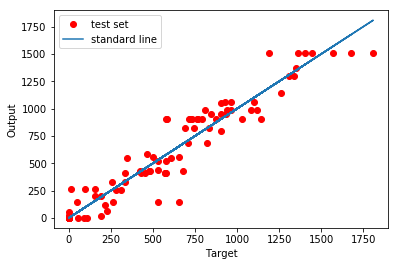

Error(RMSE): 132.98471924680285


In [27]:
def getAccuracy(testSet, predictions):
#     print(np.array(testSet)[:,-1])
    difference=np.sqrt(np.average((np.array(testSet)[:,-1]-np.array(predictions))**2))
    print('test plot')
    plt.plot(np.array(testSet)[:,-1], np.array(predictions),  'ro', label='test set')
    plt.plot(np.array(testSet)[:,-1], np.array(testSet)[:,-1], label='standard line')
    plt.xlabel("Target")
    plt.ylabel("Output")
    plt.legend()
    plt.show()
    return difference


def main():
    training_set,test_set=loadDataset('Credit.csv')
    tree = tree_building(training_set,10)
    predictions=[]
    for employee in test_set:
        predictions.append(predict(tree,employee))
    accuracy = getAccuracy(test_set, predictions)
    print('Error(RMSE): ' + repr(accuracy))
    
main()